# Narrative Flow of Men and Women



 ### Hypothesis:

Men and women discuss sociability and solidarity in different ways, i.e. in different contexts. (..) Solidarity and social relations were different in the men and women section of Birkenau; men and women recall them in different ways and contexts. In practice, this means that they are primed and followed by different topics in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women
- the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women?
- How are these topics related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- What are those topics that prime topics of solidarity and social bonds?
- Where did solidarity take place? In what contexts did solidarity take place?
- What topics do topics related to solidarity and social bonds prime for men and women?


In [2]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *

## Load the relevant data

Load interview

Set up the paths to data

Two different datasets were created. In Dataset 1, the topic 'social bonds' include 'friendship' as well; similarly the topic 'aid giving' includes 'food sharing'. In Dataset 2, 'friendship' and 'food sharing' are distinguished, and they are different topics.

First, load Dataset 1

In [5]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_complete  = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
input_directory = parent +'/'+ constants.output_data_segment_keyword_matrix
features_df = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)


Load Dataset 2

In [3]:
input_directory = 'data/output_aid_giving_sociability_expanded/markov_modelling/'

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ input_directory
data_set_2_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_2_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_2_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
input_directory = parent +'/'+ 'data/output_aid_giving_sociability_expanded/segment_keyword_matrix/'
features_df_2 = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)
features_df_2 = features_df_2.drop(columns=['Unnamed: 0','index'])


## Observation 1

### Qualitative description

For women, the main topic that primes the discussion of aid giving is the discussion of the living conditions. By contrast, the most important topic that primes aid giving for men is the discussion of forced labour activity. 

For women, the most important narrative trajectory leading to the discussion of aid giving is the following one (8.3 % of the total traffic is going through it):
- arrival-camp intake procedures-living conditions-aid giving

For men, the most important narrative trajectory leading to the discussion of aid giving is the following one (5 % of the total traffic is going through it):
- arrival-selections-camp intake procedures-living conditions-forced labor-aid giving

Both men and women discuss aid giving in the context of camp living conditions and forced labour, women are more likely to discuss it in the context of camp living conditions. While men are more likely to discuss it in the context of forced labour.

In [6]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [7]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
arrival-selections-aid giving
5.60891141239363
arrival-intake procedures-living conditions-aid giving
3.6457982592702094
arrival-selections-intake procedures-living conditions-forced labor-aid giving
3.20378009820232


In [8]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
arrival-selections-intake procedures-living conditions-camp adaptation methods-aid giving
4.442902589648374
arrival-selections-aid giving
4.018560784387126
arrival-selections-intake procedures-forced labor-aid giving
3.945855144307509


### Visualization

6 labels to show
7 labels to show


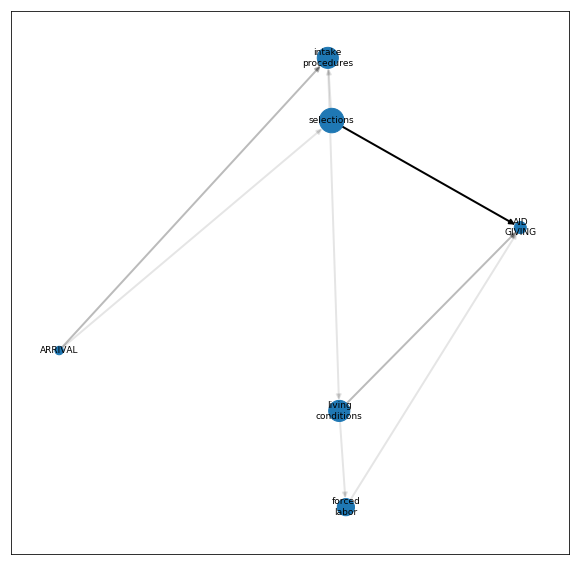

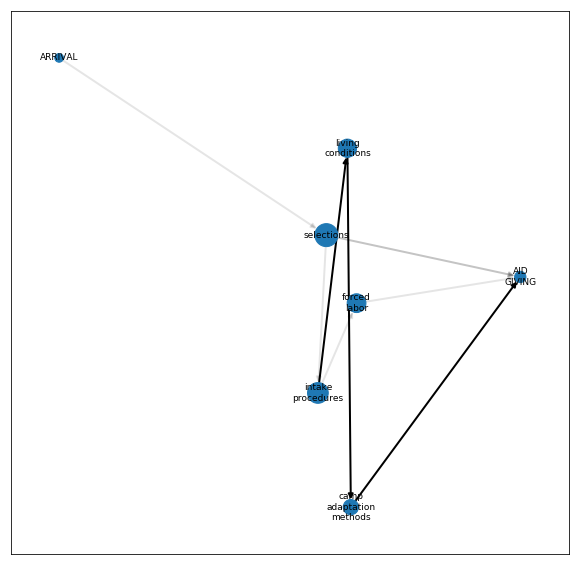

In [9]:
flux = 0.1
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [11]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [12]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
living conditions-selections-aid giving
5.41447714857993
living conditions-aid giving
4.753182708529349


In [13]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
living conditions-forced labor-aid giving
4.8810426523647195
living conditions-camp adaptation methods-aid giving
4.84744848428684
living conditions-selections-aid giving
3.8098413803104254


In [14]:
flux=0.13

4 labels to show
5 labels to show


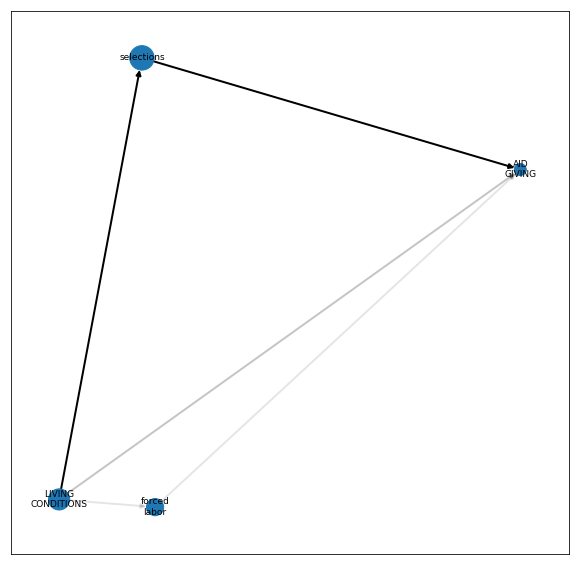

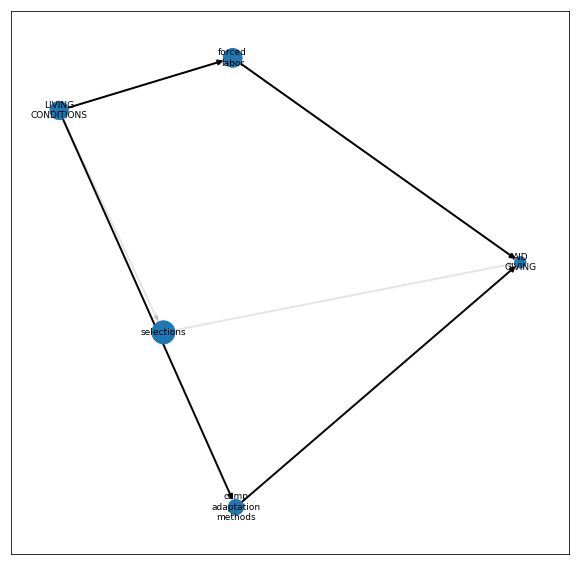

In [15]:
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. In testimonies of men, more traffic is going through the following pathway (3,6% women versus 6,2% men):

-aid giving-forced labor-departure.

In [16]:
story_start = 'aid giving'
story_end = 'departure'
flux = 0.25

In [17]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-departure
7.063241552952786
aid giving-departure
4.3724358055375685
aid giving-living conditions-departure
4.002316304278246
aid giving-camp adaptation methods-departure
3.2918047376613377
aid giving-intake procedures-living conditions-selections-transfer to camps-departure
2.206501615804922
aid giving-selections-intake procedures-mass murder awareness-departure
2.194656381407253
aid giving-loved ones' separations-intake procedures-living conditions-departure
2.161310185315474


In [18]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-intake procedures-living conditions-departure
5.587324471097996
aid giving-selections-departure
3.70511233075496
aid giving-intake procedures-food-departure
3.5114762094333227
aid giving-camp adaptation methods-departure
3.4293024219003385
aid giving-mass murder awareness-departure
2.659763100658154
aid giving-forced labor-departure
2.4640130063555747
aid giving-departure
2.3418093578873216
aid giving-living conditions-food-selections-intake procedures-housing conditions-Appell-departure
2.049335363822714


### Visualization

9 labels to show
11 labels to show


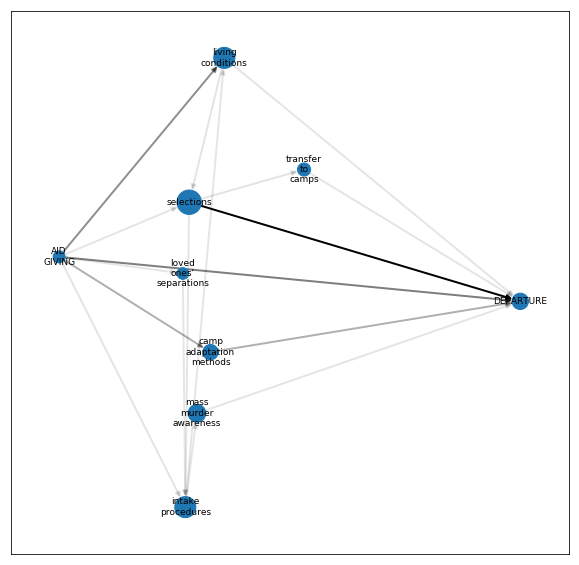

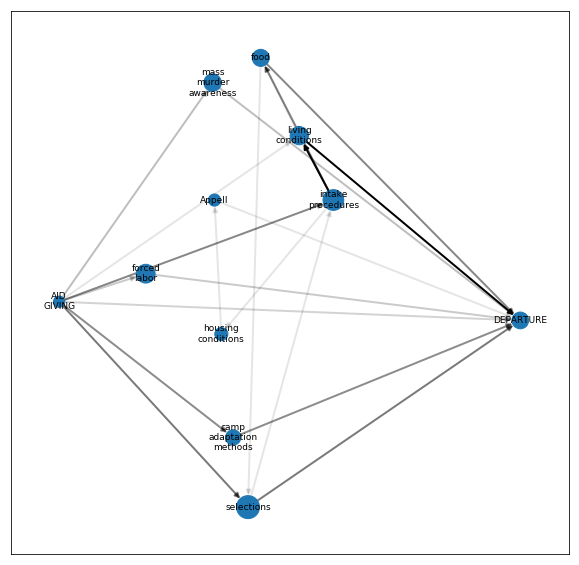

In [21]:
flux = 0.25
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 3

### Qualitative description

Similarly to aid giving, women tend to discuss food sharing in the context of living conditions, whereas men discuss it in the context of forced labour. For women, food sharing is most likely to be primed by the discussion of living conditions, for men food sharing tends to be primed by forced labour. In testimonies of women, the major traffic (16,5%) towards food sharing are going through the following two pathways:
- arrival-camp intake procedures-living conditions-food and thirst-food sharing
- arrival-selections-camp intake procedures-living conditions-food sharing

By contrast, in testimonies of men, the major traffic ( 11.33405389131642%) towards food sharing are going through the following pathways:
- arrival-selections-camp intake procedures-living conditions-forced labor-food sharing




### Visualization

In [17]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 0.17

In [22]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-departure
7.063241552952786
aid giving-departure
4.3724358055375685
aid giving-living conditions-departure
4.002316304278246
aid giving-camp adaptation methods-departure
3.2918047376613377
aid giving-intake procedures-living conditions-selections-transfer to camps-departure
2.206501615804922
aid giving-selections-intake procedures-mass murder awareness-departure
2.194656381407253
aid giving-loved ones' separations-intake procedures-living conditions-departure
2.161310185315474


In [23]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-intake procedures-living conditions-departure
5.587324471097996
aid giving-selections-departure
3.70511233075496
aid giving-intake procedures-food-departure
3.5114762094333227
aid giving-camp adaptation methods-departure
3.4293024219003385
aid giving-mass murder awareness-departure
2.659763100658154
aid giving-forced labor-departure
2.4640130063555747
aid giving-departure
2.3418093578873216
aid giving-living conditions-food-selections-intake procedures-housing conditions-Appell-departure
2.049335363822714


In [20]:
flux = 0.17

9 labels to show
11 labels to show


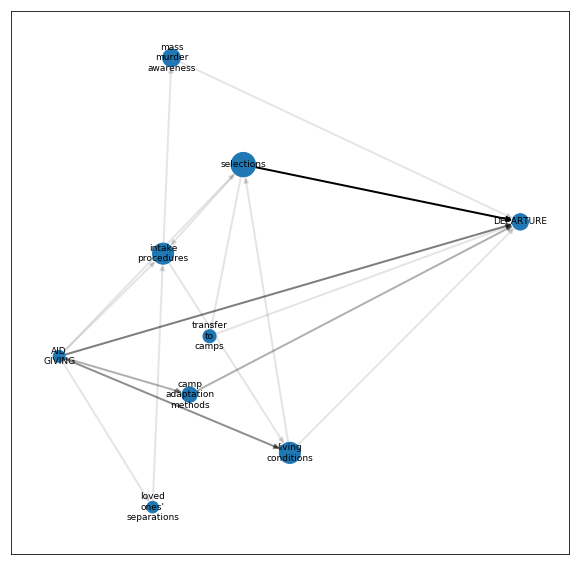

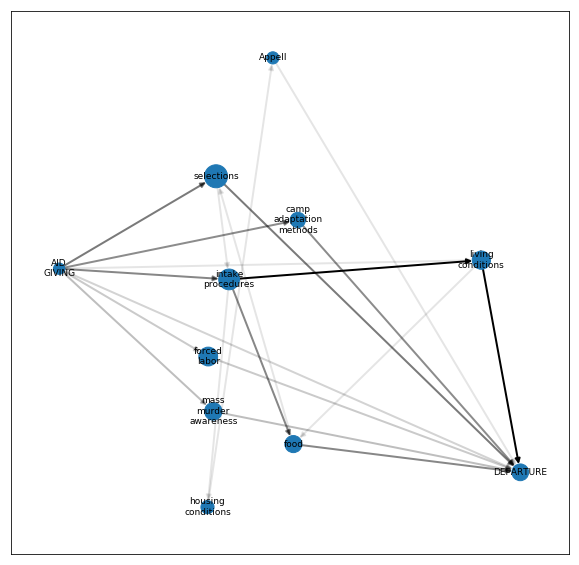

In [24]:
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 4

### Qualitative description

In testimonies of men and women, different topics are the ones that are most likely to follow food sharing. The topic that is the most likely to follow food sharing in women testimonies is again living conditions. By contrast men tend to discuss forced labour and selection following food sharing.

### Visualization

In [25]:
story_start = 'food sharing'
story_end = 'departure'
flux = 0.2

In [26]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-selections-departure
6.988044208228472
food sharing-living conditions-departure
4.520913440856343
food sharing-camp adaptation methods-departure
3.5937626566942455
food sharing-Appell-food-selections-intake procedures-living conditions-transfer procedures-departure
2.536138390223791
food sharing-departure
2.3051325183795686
food sharing-mass murder awareness-departure
2.2238108594715653


In [27]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-selections-intake procedures-living conditions-departure
4.969590232502826
food sharing-mass murder awareness-departure
4.216251595182924
food sharing-food-departure
3.7851621737211465
food sharing-living conditions-camp adaptation methods-departure
3.029258935906217
food sharing-forced labor-departure
2.4522079564080976
food sharing-camp adaptation methods-departure
2.412310493946777


10 labels to show
9 labels to show


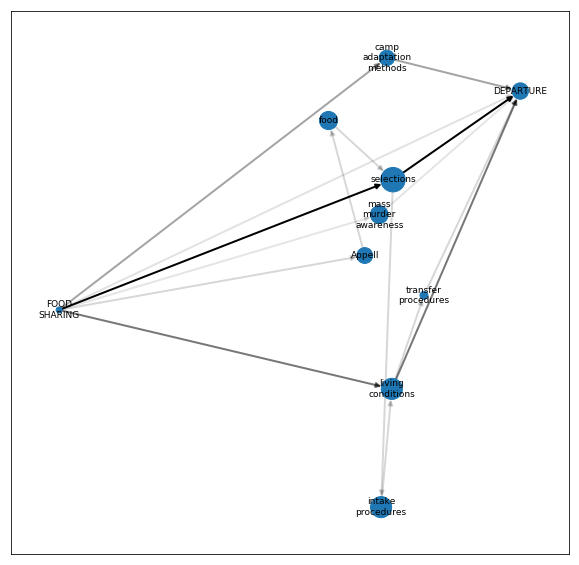

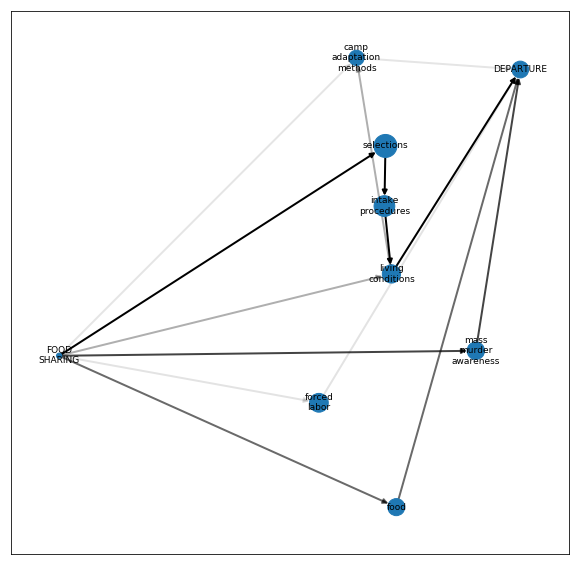

In [28]:
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 5

### Qualitative description

In narratives of women, the discussion of friendship tends to be preceded by the discussion of living environments and housing conditions. Very different amount of traffic is going through the following two narrative pathways :

- Women (12.2%):arrival-camp intake procedures-living conditions-friends
- Men (5.2%): arrival-selections-camp intake procedures-living conditions-friends



## Visualization

Path flux		%path	%of total	path
arrival-selections-intake procedures-living conditions-friends
6.303419545801675
arrival-selections-friends
4.732710990616492
arrival-intake procedures-friends
4.54472286512601
arrival-intake procedures-living conditions-forced labor-friends
3.305594628778082
arrival-intake procedures-Appell-food-friends
3.2581769415756696
arrival-selections-intake procedures-living conditions-camp adaptation methods-friends
3.011212791165673
arrival-loved ones' separations-intake procedures-mass murder awareness-friends
2.552011205487498
arrival-intake procedures-living conditions-social relations-friends
2.54163725104893
arrival-selections-intake procedures-clothing-friends
2.207388180070065
arrival-loved ones' separations-intake procedures-living conditions-selections-Mengele, Josef-friends
2.124597927724472
arrival-intake procedures-prisoner tattoos (stills)-friends
2.1143905512585133
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-aid giv

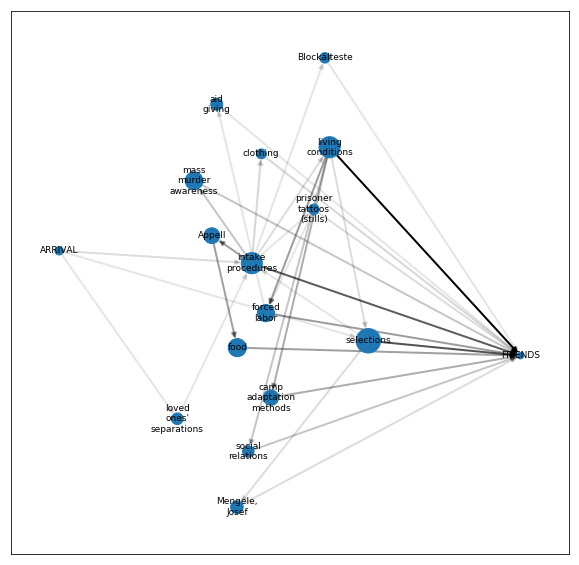

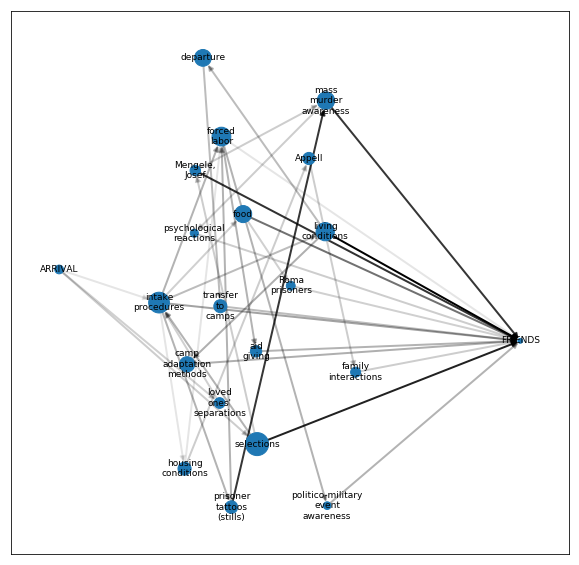

In [30]:
story_start = 'arrival'
story_end = 'friends'
flux = 0.4
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 6

### Qualitative description

In narratives of women, the most immediate topic that follows the discussion of friendship is living conditions; this pattern is very weakly present in testimonies of men.


## Visualization

Path flux		%path	%of total	path
friends-selections-departure
5.5352310636390785
friends-living conditions-departure
4.745578194457822
friends-camp adaptation methods-departure
3.7079340858812047
friends-departure
2.855399402270209
friends-food-selections-intake procedures-living conditions-transfer procedures-departure
2.4939409794211405
friends-intake procedures-living conditions-selections-transfer to camps-departure
2.20919869523309
friends-housing conditions-Appell-selections-intake procedures-mass murder awareness-departure
2.2057890304861067
friends-prisoner tattoos (stills)-living conditions-selections-intake procedures-Appell-food-departure
2.182788214104529


Path flux		%path	%of total	path
friends-selections-intake procedures-living conditions-departure
5.167734322434528
friends-intake procedures-food-departure
3.5738119215691215
friends-departure
3.2763925518240145
friends-loved ones' fates-intake procedures-living conditions-camp adaptation methods-departure
2.3244449149597

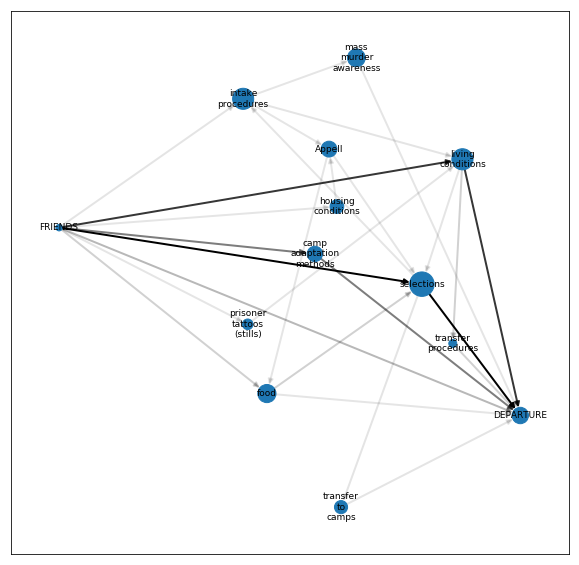

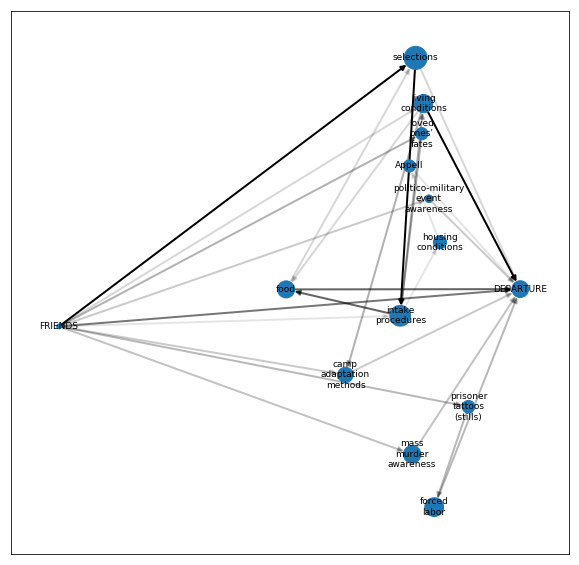

In [31]:
story_start = 'friends'
story_end = 'departure'
flux = 0.25
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we  can see that a significant amount of traffic is going through aid giving (4%) and social bonds (3.85%). Their significance can be understood if they are compared to Appel, where 9% of traffic is going through. The amount of traffic going through friendship (0.43%) and food sharing (0.48%) is less significant. I

In case of women, more traffic is going through these nodes, with an exception of food sharing:

- social bonds: 3.9 %
- aid giving: 5 %
- friendship: 0.71
- food sharing:  0.41 %

In case of men, less traffic is going through these nodes:

- social bonds: 3 %
- aid giving: 4 %
- friendship: 0.27
- food sharing:  0.53 %

#### Total traffic going through them in the complete dataset (men and women):

In [32]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-departure
6.983775185939239
arrival-intake procedures-living conditions-departure
5.988177840994656
arrival-selections-intake procedures-mass murder awareness-departure
2.885092505352682
arrival-selections-intake procedures-Appell-food-departure
2.485733062973702
arrival-intake procedures-forced labor-departure
2.2565062289885858
arrival-selections-intake procedures-living conditions-transfer procedures-departure
2.0032102568443078
arrival-selections-transfer procedures-departure
1.9210460971581633
arrival-selections-transfer to camps-departure
1.9155737084516928
arrival-selections-camp adaptation methods-departure
1.9013753850581427
arrival-intake procedures-living conditions-camp adaptation methods-departure
1.86979119526782
arrival-loved ones' separations-intake procedures-housing conditions-Appell-departure
1.6540475380798674
arrival-selections-loved ones' fates-departure
1.500080870821018
arrival-intake procedures-departure
1.4905

In [7]:
len(flux_complete_data_set_1)

218

Calculate the total traffic going through social bonds

In [34]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [35]:
for i,element in enumerate(flux_complete):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

3.2608278673588242


Calculate the total traffic going through aid giving

In [36]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

2.484643760416108


Calculate the total traffic going through Appell

In [37]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

11.888913126743033


Calculate the total traffic going through escape

In [38]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.16021453471864996


Calculate the total traffic going through friendship

In [40]:
for i,element in enumerate(flux_complete):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete[element])
print(np.array(total_friends).sum())

0.554040640681533


Calculate the total traffic going through food sharing

In [41]:
for i,element in enumerate(flux_complete):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete[element])
print(np.array(total_food_sharing).sum())

0.3236367633859654


#### Total traffic going through them in the dataset of women

In [50]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-departure
7.738138795776695
arrival-intake procedures-living conditions-departure
6.459400200565562
arrival-selections-intake procedures-living conditions-transfer procedures-departure
2.4180602359026273
arrival-selections-transfer procedures-departure
2.329395664655318
arrival-intake procedures-mass murder awareness-departure
2.306042975822705
arrival-selections-transfer to camps-departure
2.219266200796072
arrival-intake procedures-Appell-food-departure
2.1985120040573762
arrival-loved ones' separations-intake procedures-living conditions-forced labor-departure
2.1566874804718084
arrival-selections-camp adaptation methods-departure
1.7575216767418895
arrival-intake procedures-housing conditions-Appell-departure
1.543305842049777
arrival-Mengele, Josef-departure
1.486497006807744
arrival-loved ones' separations-intake procedures-living conditions-camp adaptation methods-departure
1.463687469737514
arrival-aid giving-departure
1.428707

In [52]:
len(flux_w)

661

In [53]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [54]:
for i,element in enumerate(flux_w):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

3.710574028283158


Calculate the total traffic going through aid giving

In [55]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

2.675394786970154


Calculate the total traffic going through friendship

In [56]:
for i,element in enumerate(flux_w):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w[element])
print(np.array(total_friends).sum())

0.8030287220103683


Calculate the total traffic going through food sharing

In [57]:
for i,element in enumerate(flux_w):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w[element])
        print (element)
        print (flux_w[element])
print(np.array(total_food_sharing).sum())

arrival-prisoner tattoos-prisoner tattoos (stills)-living conditions-selections-intake procedures-food-food sharing-departure
0.2828648618431796
arrival-camp adaptation methods-transfer to camps-transfer conditions-intake procedures-camp barracks-food-food sharing-beatings-departure
0.1807759046995682
arrival-loved ones' renewed contacts-selections-intake procedures-camp barracks-food-food sharing-Jewish religious texts-departure
0.07922965489615291
arrival-loved ones' togetherness decisions-family interactions-selections-intake procedures-prisoner tattoos (stills)-forced labor-food sharing-Dutch prisoners-departure
0.04263627133420801
arrival-food sharing-selections-loved ones' separations-loved ones' fates-survivor guilt-early personal aspirations-departure
0.007462214428285904
arrival-food sharing-selections-intake procedures-camp barracks-Appell-hangings-escapes-temporary identity concealment-departure
0.003787417669114787
0.5967563248705093


#### Total traffic going through them in the dataset of men

In [43]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-intake procedures-living conditions-departure
5.737852905255838
arrival-selections-departure
5.27748149439976
arrival-intake procedures-food-departure
3.7173556941369728
arrival-mass murder awareness-departure
2.959202440279691
arrival-selections-intake procedures-living conditions-camp adaptation methods-departure
2.770001328462941
arrival-selections-intake procedures-forced labor-departure
2.4331113244544795
arrival-intake procedures-Appell-departure
2.1936695379523687
arrival-selections-camp adaptation methods-departure
2.090175670760646
arrival-selections-loved ones' fates-departure
1.864605151423572
arrival-intake procedures-departure
1.7132954314648456
arrival-intake procedures-prisoner tattoos (stills)-departure
1.2854229184066823
arrival-selections-transfer to camps-departure
1.266891975627415
arrival-intake procedures-prisoner tattoos (stills)-mass murder awareness-departure
1.2486217538949698
arrival-loved ones' separations-i

In [63]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [64]:
for i,element in enumerate(flux_m):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

3.236291678342201


Calculate the total traffic going through aid giving

In [65]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

3.0111703491567843


Calculate the total traffic going through friendship

In [46]:
for i,element in enumerate(flux_m_dataset_2):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m_dataset_2[element])
print(np.array(total_friends).sum())

0.37433082977286425


Calculate the total traffic going through food sharing

In [47]:
total_food_sharing = []

In [66]:
for i,element in enumerate(flux_m):
    if 'food sharing' in element.split('-'):
        print (element)
        print (flux_m[element])
        total_food_sharing.append(flux_m[element])
print(np.array(total_food_sharing).sum())

arrival-prisoner tattoos-housing conditions-food-Mengele, Josef-intake procedures-clothing-Blockälteste-selections-loved ones' final contacts-loved ones' fates-forced labor-food sharing-departure
0.20970210288488336
arrival-Appell-psychological reactions-uniforms-housing conditions-food sharing-mass murder awareness-living conditions-education-departure
0.03703646394389847
arrival-mothers-Mengele, Josef-intake procedures-housing conditions-food sharing-social relations-transfer to camps-forced march conditions-forced march adaptation methods-forced march shoes-departure
0.013616249378010504
arrival-food sharing-populations-housing conditions-living conditions-transfers, means of transport-transfer corpses-Jewish persecution bystander responses-transfer adaptation methods-transfer-related aid giving-transfer physical condition-Jewish religious observances-inter-Jewish relations-departure
0.005666819490556321
arrival-Jewish holiday awareness-Jewish religious observances-selections-intake

## Observation 8

### Qualitative Description

In testimonies of women there are important narrative pathways that lead to the discussion of survival explanations and involve social bonds and aid giving as states preceding survival explanations; in testimonies of men such paths have significantly less traffic. We can see a similar pattern with friends and food sharing, though they are less significant.

In [67]:
story_start = 'arrival'
story_end = 'survival explanations'


In [68]:
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-survival explanations
5.552368311178076
arrival-intake procedures-living conditions-survival explanations
3.922734631079232
arrival-selections-intake procedures-mass murder awareness-survival explanations
3.3531345840476883
arrival-intake procedures-Appell-survival explanations
3.2313862099109563
arrival-selections-intake procedures-living conditions-camp adaptation methods-survival explanations
2.916577684477816
arrival-intake procedures-family interactions-survival explanations
2.4835151402063333
arrival-selections-departure-transfer to camps-survival explanations
2.3953277207387416
arrival-loved ones' separations-intake procedures-living conditions-selections-Mengele, Josef-survival explanations
2.3346927522609153
arrival-intake procedures-living conditions-forced labor-survival explanations
2.3331432236391327
arrival-selections-intake procedures-living conditions-social relations-survival explanations
2.3312393675192844
arrival-lov

Path flux		%path	%of total	path
arrival-selections-survival explanations
5.665597700449701
arrival-selections-loved ones' fates-survival explanations
4.35821053756888
arrival-selections-intake procedures-living conditions-departure-survival explanations
3.5412826178851637
arrival-intake procedures-living conditions-survival explanations
2.9519503034432035
arrival-selections-departure-forced march conditions-survival explanations
2.33692112356765
arrival-intake procedures-food-survival explanations
2.2569281402356434
arrival-selections-intake procedures-forced labor-survival explanations
2.1912407339964135
arrival-intake procedures-prisoner tattoos (stills)-survival explanations
2.0012298091825254
arrival-selections-intake procedures-living conditions-camp adaptation methods-departure-transfer to camps-survival explanations
1.9968412612473672
arrival-intake procedures-living conditions-camp adaptation methods-survival explanations
1.9298934795681881
arrival-selections-camp adaptation me

Find social bonds in women narratives

In [73]:
for element in flux_w:
    if 'social relations' in element.split('-'):
        print (element)
        print (flux_w[element])
        print ('\n')

arrival-selections-intake procedures-living conditions-social relations-survival explanations
2.3312393675192844


arrival-social relations-departure-United States soldiers-displaced persons camps (generic)-Jewish identity-survival explanations
0.27836144057061507


arrival-humiliation-clothing-housing conditions-social relations-Polish kapos-survival explanations
0.2695608397435625


arrival-camp adaptation methods-departure-transfer conditions-intake procedures-housing conditions-social relations-deaths-survival explanations
0.14615453523262903


arrival-Grese, Irma-social relations-departure-transfers, means of transport-post-conflict persecution site visits-intergenerational genocide impact-inter-Jewish relations-survival explanations
0.14011291504688772


arrival-hunger-selections-intake procedures-housing conditions-social relations-medical personnel-survival explanations
0.08599564273139824


arrival-Hungarian prisoners-social relations-departure-transfer conditions-intake proce

Find aid giving in women narratives

In [71]:
for element in flux_w:
    if 'aid giving' in element.split('-'):
        print (element)
        print (flux_w[element])
        print ('\n')

arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-survival explanations
2.21371138782514


arrival-aid giving-selections-transfer to camps-German soldiers-survival explanations
0.5709914241174239


arrival-aid giving-selections-loved ones' final contacts-survival explanations
0.4911443733019497


arrival-aid giving-selections-intake procedures-Appell-kapos-survival explanations
0.30232631695704576


arrival-children-diseases-aid giving-selections-intake procedures-prisoner tattoos-prisoner tattoo removal-survival explanations
0.09441769988419252


arrival-aid giving-selections-intake procedures-housing conditions-food-menstruation-survival explanations
0.06265354966131698


arrival-diseases-aid giving-selections-intake procedures-living conditions-departure-freight trains-deportation experiences-survival explanations
0.05401817091342419


arrival-Siemens (firm)-aid giving-selections-intake procedures-living conditions-mass murder awareness-Slovak kapos-surviva

Find social bonds in men narratives

In [74]:
for element in flux_m:
    if 'social relations' in element.split('-'):
        print (element)
        print (flux_m[element])
        print ('\n')

arrival-forced labor-aid giving-selections-intake procedures-living conditions-social relations-survival explanations
0.5560448494817933


arrival-social relations-aid giving-loved ones' fates-medical care-criminal prisoners-survival explanations
0.1543880241600846


arrival-human soap rumors-uniforms-housing conditions-sanitary conditions-selections-intake procedures-social relations-Polish prisoner functionaries-survival explanations
0.1477701112262513


arrival-deportation from ghettos-selections-intake procedures-social relations-camp blood extraction-survival explanations
0.1032095197915489


arrival-hospitals-social relations-selections-intake procedures-living conditions-departure-transfers, means of transport-transfer food-Holocaust-related psychological reactions-Holocaust testimony sharing reluctance-future message-interviewee photographs (stills)-famous writers and publishers-transfer family interactions-survival explanations
0.08972520069857062


arrival-transfer guards-SS/

Find aid giving in men narratives

In [75]:
for element in flux_m:
    if 'aid giving' in element.split('-'):
        print (element)
        print (flux_m[element])
        print ('\n')

arrival-selections-camp adaptation methods-aid giving-survival explanations
1.8089310062209856


arrival-aid giving-selections-intake procedures-food-departure-forced march food acquisition-mass executions-survival explanations
0.8010313412967428


arrival-forced labor-aid giving-selections-intake procedures-living conditions-social relations-survival explanations
0.5560448494817933


arrival-aid giving-selections-Mengele, Josef-mass murder awareness-personal property seizure-survival explanations
0.30730837693780405


arrival-Blockälteste-selections-intake procedures-Appell-forced labor-aid giving-loved ones' fates-politico-military event awareness-cultural activities-survival explanations
0.17890717898517267


arrival-social relations-aid giving-loved ones' fates-medical care-criminal prisoners-survival explanations
0.1543880241600846


arrival-orchestras-camp adaptation methods-intake procedures-forced labor-aid giving-famous Polish politicians and diplomats-survival explanations
0.

## Visualize

Notice that aid giving and social bonds are "missing" from the plot showing men

25 labels to show
34 labels to show


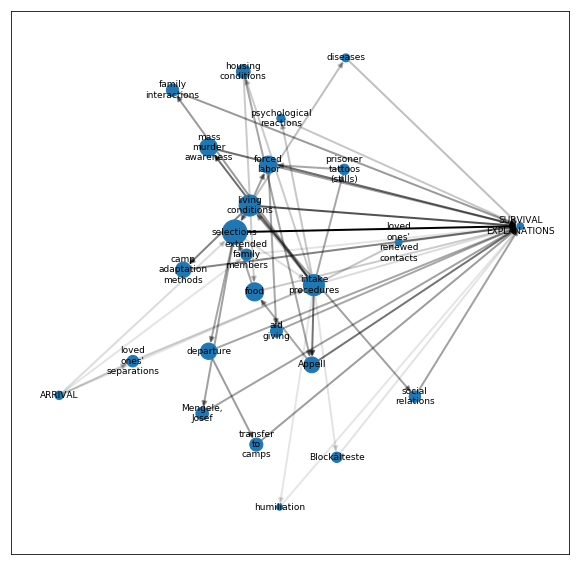

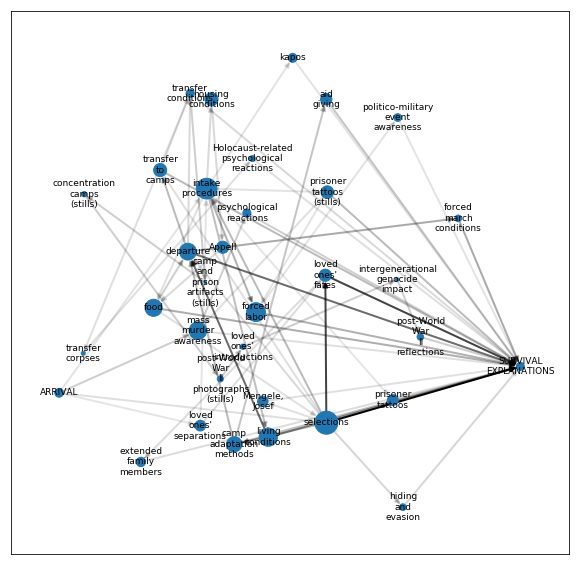

In [80]:
flux = 0.45
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [81]:
story_start = 'arrival'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
arrival-selections-survival explanations
5.552368311178076
arrival-intake procedures-living conditions-survival explanations
3.922734631079232
arrival-selections-intake procedures-mass murder awareness-survival explanations
3.3531345840476883
arrival-intake procedures-Appell-survival explanations
3.2313862099109563
arrival-selections-intake procedures-living conditions-camp adaptation methods-survival explanations
2.916577684477816
arrival-intake procedures-family interactions-survival explanations
2.4835151402063333
arrival-selections-departure-transfer to camps-survival explanations
2.3953277207387416
arrival-loved ones' separations-intake procedures-living conditions-selections-Mengele, Josef-survival explanations
2.3346927522609153
arrival-intake procedures-living conditions-forced labor-survival explanations
2.3331432236391327
arrival-selections-intake procedures-living conditions-social relations-survival explanations
2.3312393675192844
arrival-lov

Path flux		%path	%of total	path
arrival-selections-survival explanations
5.665597700449701
arrival-selections-loved ones' fates-survival explanations
4.35821053756888
arrival-selections-intake procedures-living conditions-departure-survival explanations
3.5412826178851637
arrival-intake procedures-living conditions-survival explanations
2.9519503034432035
arrival-selections-departure-forced march conditions-survival explanations
2.33692112356765
arrival-intake procedures-food-survival explanations
2.2569281402356434
arrival-selections-intake procedures-forced labor-survival explanations
2.1912407339964135
arrival-intake procedures-prisoner tattoos (stills)-survival explanations
2.0012298091825254
arrival-selections-intake procedures-living conditions-camp adaptation methods-departure-transfer to camps-survival explanations
1.9968412612473672
arrival-intake procedures-living conditions-camp adaptation methods-survival explanations
1.9298934795681881
arrival-selections-camp adaptation me

Find friends in women narratives

In [82]:
for element in flux_w:
    if 'friends' in element.split('-'):
        print (element)
        print (flux_w[element])
        print ('\n')

arrival-housing conditions-food-selections-intake procedures-friends-survival explanations
0.6918137812673809


arrival-clothing-housing conditions-Appell-selections-intake procedures-living conditions-friends-survival explanations
0.3614541780337088


arrival-children-friends-Roma prisoners-selections-intake procedures-living conditions-departure-forced march deaths-survival explanations
0.3584905837623415


arrival-loved ones' final contacts-intake procedures-Blockälteste-friends-corpse disposal forced labor-survival explanations
0.27057533648015225


arrival-friends-food additives-selections-intake procedures-Appell-suicide decisions-survival explanations
0.24974962421111957




Find food sharing in women narratives

In [83]:
for element in flux_w:
    if 'food sharing' in element.split('-'):
        print (element)
        print (flux_w[element])
        print ('\n')

arrival-loved ones' separations-intake procedures-housing conditions-food-food sharing-survival explanations
0.27157477423680854


arrival-musical recitals-forced labor-camp adaptation methods-departure-transfer to camps-freight trains-intake procedures-food-food sharing-beatings-emotions-survival explanations
0.025295965505230385


arrival-forced labor companies-Appell-food-food sharing-beatings-survival explanations
0.0141030089575061


arrival-food sharing-selections-intake procedures-food-menstruation-survival explanations
0.010929627598908927


arrival-food sharing-selections-intake procedures-mass murder awareness-attitudes toward Germany and/or Germans-corpse disposal forced labor-survival explanations
0.00027837484532606063




Find friends in men narratives

In [84]:
for element in flux_m:
    if 'friends' in element.split('-'):
        print (element)
        print (flux_m[element])
        print ('\n')

arrival-mass murder awareness-forced labor-camp adaptation methods-intake procedures-housing conditions-Appell-selections-medical experiments-post-conflict medical problems-friends-survival explanations
0.40869154427156434


arrival-Ukrainian camp guards-intake procedures-housing conditions-food-friends-survival explanations
0.029638082863298585


arrival-friends-prisoner identification numbers-mass murder awareness-departure-transfers, means of transport-transfer corpses-Jewish persecution bystander responses-transfer adaptation methods-preferential treatment-survival explanations
0.006724564124094583


arrival-cultural activities-food acquisition-selections-Mengele, Josef-friends-survival explanations
0.005695263600523249


arrival-friends-sanitary conditions-selections-transfer to camps-sisters-survival explanations
0.00482045959873423


arrival-friends-prisoner identification numbers-mass murder awareness-departure-transfer conditions-deportation awareness-Jewish prisoner functiona

Find food sharing in men narratives

In [85]:
for element in flux_m:
    if 'food sharing' in element.split('-'):
        print (element)
        print (flux_m[element])
        print ('\n')

arrival-injuries-medical care-selections-intake procedures-Appell-forced labor-food sharing-aborted killings-survival explanations
0.030071796978995053


arrival-food sharing-populations-housing conditions-living conditions-transfer to camps-forced march conditions-freight trains-deportation conditions-survival explanations
0.005195449841321257


arrival-food sharing-populations-housing conditions-living conditions-transfer to camps-forced march conditions-freight trains-survival explanations
0.0006571721440668445




## Observation 9

### Qualitative description

The moment when one particularly needed the help of others was the selection, when the ill and those who were unable to work were selected to be sent to gas chambers. In testimonies we can often read that victims helped each other in these moments (for instance by hiding or holding the ill); yet victims attribute their survival of selections to the help of their peers and friends. This narrative frame corresponds to the following narrative pathways:
- selections-social bonds-survival explanations
- selections-aid giving-survival explanations

These narrative pathways are more significant in testimonies of women than men.


### Visualization

In [86]:
story_start = 'selections'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
selections-survival explanations
5.870451302949376
selections-intake procedures-living conditions-survival explanations
3.9167084981683633
selections-mass murder awareness-survival explanations
3.3495005142008365
selections-camp adaptation methods-survival explanations
2.9272578972076078
selections-intake procedures-Appell-survival explanations
2.809902634052767
selections-departure-transfer to camps-survival explanations
2.4076287936933904
selections-Mengele, Josef-survival explanations
2.3210657099098513
selections-forced labor-survival explanations
1.972544098413553
selections-intake procedures-living conditions-departure-survival explanations
1.9612021022458472
selections-family interactions-survival explanations
1.498444196559162
selections-intake procedures-housing conditions-Appell-food-survival explanations
1.4874717420089754
selections-aid giving-survival explanations
1.2616531719995248
selections-intake procedures-survival explanations
1.135183

Path flux		%path	%of total	path
selections-survival explanations
6.135309420486686
selections-intake procedures-living conditions-survival explanations
2.9463347751961586
selections-loved ones' fates-survival explanations
2.827098319249249
selections-departure-survival explanations
2.5300481465512212
selections-camp adaptation methods-departure-forced march conditions-survival explanations
2.3355433027774986
selections-intake procedures-food-survival explanations
2.2496910109307375
selections-forced labor-survival explanations
2.1894999867147296
selections-living conditions-departure-transfer to camps-survival explanations
1.9985042854645758
selections-intake procedures-prisoner tattoos (stills)-survival explanations
1.9953913537641714
selections-intake procedures-living conditions-camp adaptation methods-survival explanations
1.4565327674413344
selections-intake procedures-housing conditions-Appell-food-departure-transfer conditions-survival explanations
1.4086135564521018
selections-

16 labels to show
20 labels to show


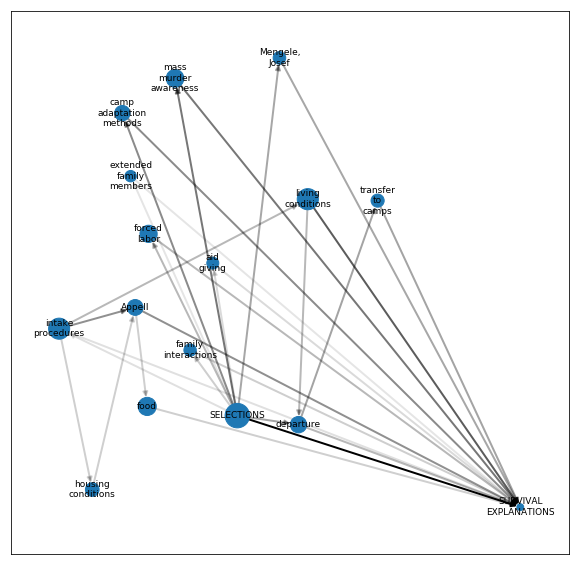

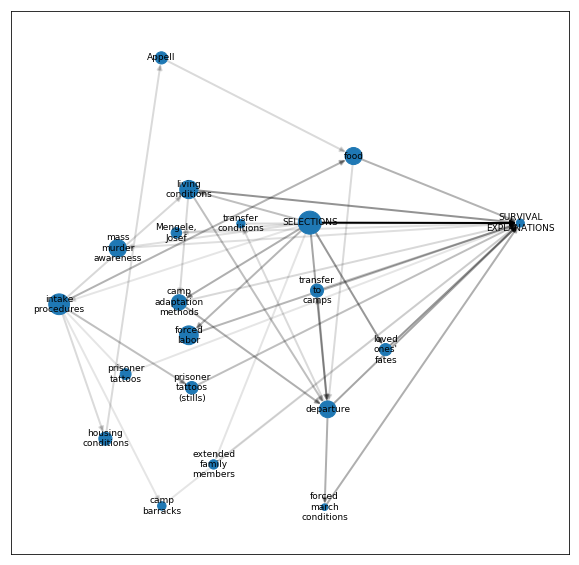

In [96]:
flux = 0.33
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

Find social bonds as transitionary topic between selection and survival explanation in narratives of women

In [87]:
for element in flux_w:
    if 'social relations' in element.split('-') and len(element.split('-'))<5:
        print (element)
        print (flux_w[element])
        print ('\n')

selections-social relations-survival explanations
0.940523684630645


selections-intake procedures-social relations-survival explanations
0.19941052083479735




In [97]:
for element in flux_w:
    if 'friends' in element.split('-') and len(element.split('-'))<5:
        print (element)
        print (flux_w[element])
        print ('\n')

selections-friends-survival explanations
0.3510779336389141


selections-living conditions-friends-survival explanations
0.15223387903009594




Find social bonds as transitionary topic between selection and survival explanation in narratives of men

In [88]:
for element in flux_m:
    if 'social relations' in element.split('-') and len(element.split('-'))<5:
        print (element)
        print (flux_m[element])
        print ('\n')

selections-social relations-survival explanations
0.4871781477659202




In [100]:
for element in flux_m:
    if 'friends' in element.split('-') and len(element.split('-'))<5:
        print (element)
        print (flux_m[element])
        print ('\n')

selections-friends-survival explanations
0.18756031482654426




Find aid giving as transitionary topic between selection and survival explanation in narratives of women

In [89]:
for element in flux_w:
    if 'aid giving' in element.split('-') and len(element.split('-'))<5:
        print (element)
        print (flux_w[element])
        print ('\n')

selections-aid giving-survival explanations
1.2616531719995248


selections-food-aid giving-survival explanations
0.12346954534077971




Find aid giving as transitionary topic between selection and survival explanation in narratives of men

In [90]:
for element in flux_m:
    if 'aid giving' in element.split('-') and len(element.split('-'))<5:
        print (element)
        print (flux_m[element])
        print ('\n')

selections-aid giving-survival explanations
0.9000586654950886


selections-camp adaptation methods-aid giving-survival explanations
0.5086210713337436




## Interpretation

The main context of solidarity for women was the barack, i.e. the everyday living environment. By contrast, for men solidarity was rather connected with forced labour and the working environment. Therefore, women and men remember about acts of solidarity in different contexts, which also suggests that they took place in different contexts in the past.

We can see a similar pattern with social activity. Women discuss it in the context of the living environment, whereas man discuss it in the context of work environment.

Generally, speaking if we look at the amount of traffic going through social activity and solidarity, we can see that in case of  women more traffic is going towards solidarity and social activity. 

What also illustrates the different role of solidarity and sociability for men and women is that women are likely to attribute their survival to them